# SVM

In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
import numpy as np


In [3]:
x,y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_redundant=0)

In [10]:
#converting the y-labels into (1,-1)
y[y==0]=-1#broadcasting
print(y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

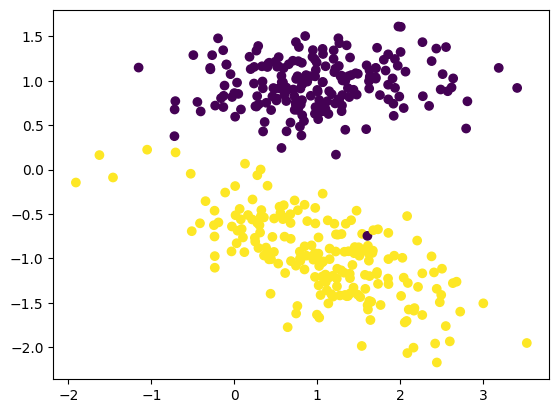

In [11]:
plt.scatter(x[:,0],x[:,1],c=y)

In [39]:
from re import L
import numpy as np
import random

class SVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0

    def hingeloss(self, w, b, x, y):
        loss = 0.0
        loss += 0.5 * np.dot(w, w.T)
        m = x.shape[0]
        for i in range(m):
            ti = y[i] * (np.dot(w, x[i].T) + b)
            loss += self.c * max(0, (1 - ti))
        return loss

    def fit(self, x, y, batch_size=100, learning_rate=0.001, maxItr=300):
        no_of_features = x.shape[1]
        no_of_samples = x.shape[0]
        n = learning_rate
        c = self.c
        # Init the model parameters
        w = np.zeros((1, no_of_features))
        bias = 0
        # Initial loss
        print(self.hingeloss(w, bias, x, y))
        # Training from here
        # Weight and bias update rule.
        losses = []
        bias = 0
        # Generate shuffled indices
        ids = list(range(no_of_samples))
        random.shuffle(ids)

        for i in range(maxItr):
            # Training loop
            l = self.hingeloss(w, bias, x, y)
            losses.append(l)
            # Batch Gradient Descent (paper) with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0
                # Iterate over all examples in the mini-batch
                for j in range(batch_start, batch_start+batch_size):
                    idx = ids[j]
                    ti = y[idx] * (np.dot(w, x[idx].T) + bias)
                    if ti > 1:
                        gradw += 0
                        gradb += 0
                    else:
                        gradw += c * y[idx] * x[idx]
                        gradb += c * y[idx]
                # Gradient for the batch is ready! Update w, b
                w = w - n * w + n * gradw
                bias = bias + n * gradb

        self.w = w
        self.b = bias
        return w, bias, losses


In [40]:
mysvm=SVM()

In [43]:
w,b,losses=mysvm.fit(x,y)
print(losses)

[[400.]]
[array([[400.]]), array([[250.82741053]]), array([[120.39222477]]), array([[69.30890311]]), array([[52.02335713]]), array([[44.17122686]]), array([[39.05653473]]), array([[35.40777797]]), array([[32.63496262]]), array([[30.35205847]]), array([[28.55126829]]), array([[26.9686523]]), array([[25.71325932]]), array([[24.63200999]]), array([[23.64971587]]), array([[22.85936267]]), array([[22.19570658]]), array([[21.68685917]]), array([[21.2768995]]), array([[20.90507824]]), array([[20.5645558]]), array([[20.27361194]]), array([[20.0053402]]), array([[19.76537366]]), array([[19.54913931]]), array([[19.33374824]]), array([[19.11919609]]), array([[18.90655844]]), array([[18.72948194]]), array([[18.5701642]]), array([[18.41206935]]), array([[18.26819835]]), array([[18.13721261]]), array([[18.01435328]]), array([[17.89262613]]), array([[17.77082491]]), array([[17.65041572]]), array([[17.53056075]]), array([[17.41033521]]), array([[17.30609367]]), array([[17.21783829]]), array([[17.12994

In [ ]:
ids=np.arange(100)
np.random.shuffle(ids)
print(ids)

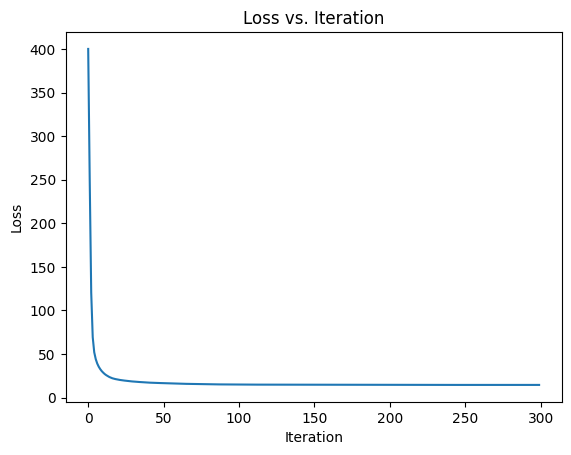

In [46]:
import matplotlib.pyplot as plt
# After the fit() method
plt.plot(np.ravel(losses))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()

In [50]:
w,b=mysvm.w,mysvm.b
print(w,b)

[[-0.34238358 -2.08590661]] 0.42200000000000026


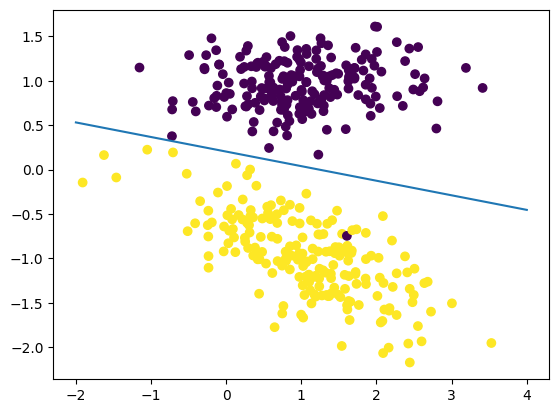

In [57]:
def plotHyperplan(w1, w2, b):
    x_1 = np.linspace(-2, 4, 10)
    x_2 = -(w1 * x_1 + b) / w2
    plt.plot(x_1, x_2)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()

#Call the function with the appropriate values
plotHyperplan(w[0, 0], w[0, 1], b)
